In [1]:
# Cell 1: Load Libraries & Optionally Load Previously Trained Model and Data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader # For batch training
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Define your model architecture again (or import if saved in a .py file) ---
# This should be the SAME architecture as the model you are loading or just trained.
# We need it to load the state_dict.
# Make sure 'input_features' is defined (e.g., from X_test_tensor.shape[1] if loading tensors)

# Example: Determine input_features if loading tensors (adjust path if needed)
try:
    # For error analysis, we primarily need test data and predictions.
    # If you saved tensors from the previous notebook:
    processed_data_path = 'data/processed_tensors'
    X_test_tensor = torch.load(f'{processed_data_path}/X_test_tensor.pt')
    y_test_tensor = torch.load(f'{processed_data_path}/y_test_tensor.pt')
    X_train_tensor = torch.load(f'{processed_data_path}/X_train_tensor.pt') # Needed for retraining/Dataset
    y_train_tensor = torch.load(f'{processed_data_path}/y_train_tensor.pt') # Needed for retraining/Dataset

    input_features = X_test_tensor.shape[1]
    print(f"Data loaded. Input features: {input_features}")
except FileNotFoundError:
    print("Tensor files not found. Ensure 'input_features', 'X_test_tensor', 'y_test_tensor', 'X_train_tensor', 'y_train_tensor' are available from a previous session.")
    print("Or, ensure 'y_test_np' and 'y_pred_np' are available if you skip loading a model and go straight to error analysis of a previous run.")
    input_features = 0 # Set a default or load X_train_tensor.shape[1]
    # You might need to manually define y_test_np and y_pred_np if not re-running predictions

class PricePredictor(nn.Module): # Paste your model definition here
    def __init__(self, num_input_features):
        super(PricePredictor, self).__init__()
        self.layer_1 = nn.Linear(num_input_features, 128)
        self.relu1 = nn.ReLU()
        self.layer_2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(64, 1)
    def forward(self, x):
        x = self.relu1(self.layer_1(x)); x = self.relu2(self.layer_2(x)); x = self.output_layer(x); return x

# --- Optionally load a saved model state ---
model_to_analyze = None
if input_features > 0:
    model_to_analyze = PricePredictor(input_features)
    model_load_path = 'saved_models/price_predictor_model_v1.pth' # Path to your saved model
    try:
        model_to_analyze.load_state_dict(torch.load(model_load_path))
        model_to_analyze.eval() # Set to evaluation mode
        print(f"Previously trained model loaded from {model_load_path}")

        # Generate predictions if model is loaded (or use y_pred_np from previous notebook run)
        with torch.no_grad():
            y_pred_tensor = model_to_analyze(X_test_tensor)
        y_pred_np = y_pred_tensor.numpy()
        y_test_np = y_test_tensor.numpy() # Ensure y_test_np is also available

    except FileNotFoundError:
        print(f"Saved model not found at {model_load_path}. Ensure 'y_pred_np' and 'y_test_np' are available from your last notebook run if you skip this.")
    except RuntimeError as e:
        print(f"Error loading model state_dict (possibly architecture mismatch or input_features not set): {e}")
        print("Ensure 'input_features' is correct and model definition matches the saved model.")

else:
    print("Input features not determined. Cannot load or define model.")

Data loaded. Input features: 3643
Previously trained model loaded from saved_models/price_predictor_model_v1.pth


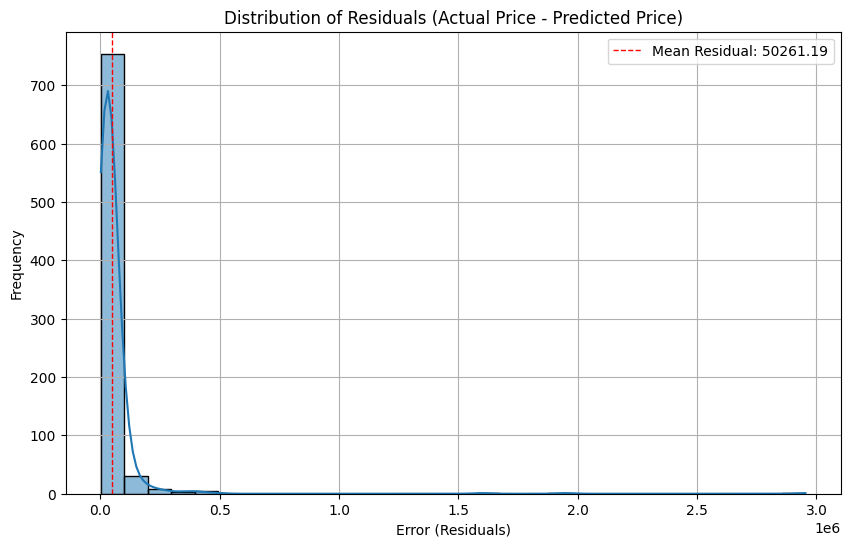

Mean of Residuals: 50261.1914
Standard Deviation of Residuals: 142967.0312


In [2]:
# Cell 2: Deeper Evaluation - Visualize Residuals (Histogram)
# Assumes y_test_np and y_pred_np are available either from Cell 1 (model loading & prediction)
# or from the last run of your previous prototyping notebook.

if 'y_test_np' in locals() and 'y_pred_np' in locals():
    residuals = y_test_np - y_pred_np
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title('Distribution of Residuals (Actual Price - Predicted Price)')
    plt.xlabel('Error (Residuals)')
    plt.ylabel('Frequency')
    plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=1, label=f'Mean Residual: {residuals.mean():.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Mean of Residuals: {residuals.mean():.4f}")
    print(f"Standard Deviation of Residuals: {residuals.std():.4f}")
else:
    print("Error: y_test_np or y_pred_np not defined. Please run predictions first.")

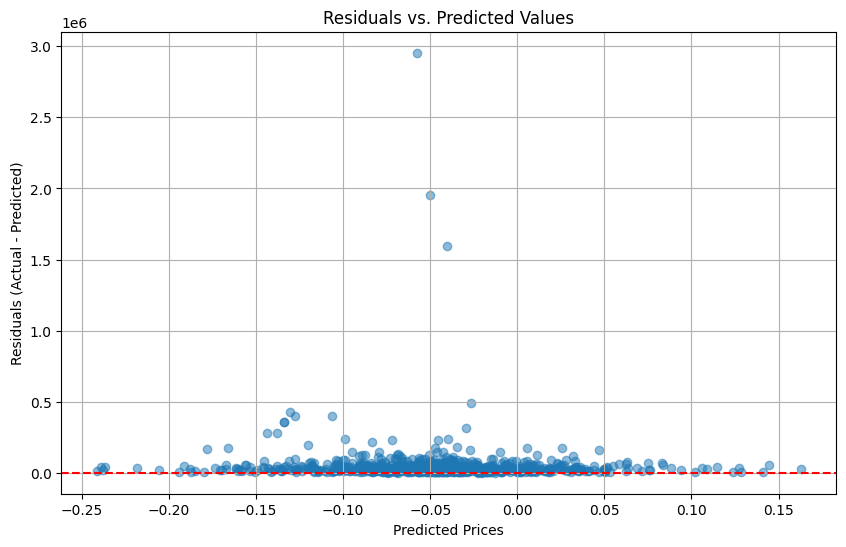

In [3]:
# Cell 3: Deeper Evaluation - Scatter Plot of Residuals vs. Predicted Values
# Assumes y_test_np and y_pred_np are available.

if 'y_test_np' in locals() and 'y_pred_np' in locals() and 'residuals' in locals():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_np, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--') # Line at zero error
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True)
    plt.show()
else:
    print("Error: y_pred_np or residuals not defined. Please run predictions and calculate residuals first.")

In [4]:
# Cell 4: Prepare for Model Architecture / Hyperparameter Experimentation
# Re-define or modify your model architecture here if you want to experiment.
# Then, re-instantiate the model and set up a new optimizer.

# Example: To try a different architecture or just re-initialize for hyperparameter tuning
# Ensure 'input_features' is correctly defined from Cell 1 or your data.
if input_features > 0:
    # OPTION 1: Re-use existing PricePredictor class definition from Cell 1
    # If you want to change architecture, modify the PricePredictor class in Cell 1 (or a new cell) and re-run it.
    
    # OPTION 2: Define a new/modified model here for quick tests
    # class PricePredictorV2(nn.Module):
    #     def __init__(self, num_input_features):
    #         super(PricePredictorV2, self).__init__()
    #         self.layer_1 = nn.Linear(num_input_features, 256) # More neurons
    #         self.relu1 = nn.ReLU()
    #         self.dropout1 = nn.Dropout(0.2) # Added dropout
    #         self.layer_2 = nn.Linear(256, 128)
    #         self.relu2 = nn.ReLU()
    #         self.dropout2 = nn.Dropout(0.2)
    #         self.output_layer = nn.Linear(128, 1)
    #     def forward(self, x):
    #         x = self.relu1(self.layer_1(x)); x = self.dropout1(x)
    #         x = self.relu2(self.layer_2(x)); x = self.dropout2(x)
    #         x = self.output_layer(x); return x
    # new_model = PricePredictorV2(input_features)
    
    # For this iteration, let's assume we are re-instantiating the original model for new hyperparams
    current_model_for_tuning = PricePredictor(input_features) # Using definition from Cell 1
    print("New model instance created for tuning/experimentation:")
    print(current_model_for_tuning)

    # Define new criterion and optimizer with potentially different hyperparameters
    criterion_tuned = nn.MSELoss()
    # Example: Try a different learning rate
    new_learning_rate = 0.0005
    optimizer_tuned = optim.Adam(current_model_for_tuning.parameters(), lr=new_learning_rate)

    print(f"\nNew criterion: {criterion_tuned}")
    print(f"New optimizer: Adam with learning rate {new_learning_rate}")
else:
    print("Cannot prepare for experimentation: input_features not set.")

New model instance created for tuning/experimentation:
PricePredictor(
  (layer_1): Linear(in_features=3643, out_features=128, bias=True)
  (relu1): ReLU()
  (layer_2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

New criterion: MSELoss()
New optimizer: Adam with learning rate 0.0005



Starting re-training with new settings (Epochs: 250, LR: 0.0005)...
Epoch [25/250], Loss: 4480702976.0000
Epoch [50/250], Loss: 4479784960.0000
Epoch [75/250], Loss: 4476923392.0000
Epoch [100/250], Loss: 4470344192.0000
Epoch [125/250], Loss: 4457976320.0000
Epoch [150/250], Loss: 4437660160.0000
Epoch [175/250], Loss: 4407288320.0000
Epoch [200/250], Loss: 4364878336.0000
Epoch [225/250], Loss: 4308119040.0000
Epoch [250/250], Loss: 4235387136.0000
Re-training complete.


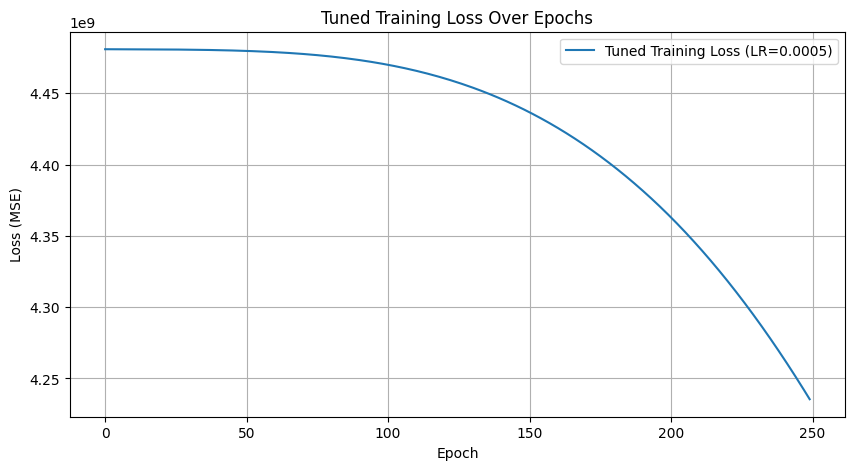

In [5]:
# Cell 5: Re-Training the Model (After Architecture/Hyperparameter Changes)
# This is a copy of your training loop (Cell 4 from the previous "prototyping" notebook).
# Run this cell AFTER you've made changes in Cell 4 above.
# Ensure 'current_model_for_tuning', 'criterion_tuned', 'optimizer_tuned', 
# 'X_train_tensor', and 'y_train_tensor' are defined.

if 'current_model_for_tuning' in locals() and \
   'criterion_tuned' in locals() and \
   'optimizer_tuned' in locals() and \
   X_train_tensor.nelement() > 0 :

    epochs_tuned = 250 # Example: try more or fewer epochs
    print(f"\nStarting re-training with new settings (Epochs: {epochs_tuned}, LR: {new_learning_rate})...")
    tuned_train_losses = []

    for epoch in range(epochs_tuned):
        current_model_for_tuning.train()
        outputs = current_model_for_tuning(X_train_tensor)
        loss = criterion_tuned(outputs, y_train_tensor)
        optimizer_tuned.zero_grad()
        loss.backward()
        optimizer_tuned.step()
        tuned_train_losses.append(loss.item())
        if (epoch + 1) % 25 == 0:
            print(f'Epoch [{epoch+1}/{epochs_tuned}], Loss: {loss.item():.4f}')
    
    print("Re-training complete.")
    plt.figure(figsize=(10,5))
    plt.plot(tuned_train_losses, label=f'Tuned Training Loss (LR={new_learning_rate})')
    plt.title('Tuned Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nCannot start re-training. Check variables from Cell 4 and data loading.")

In [6]:
# Cell 6: Re-Evaluating the Model (After Retraining)
# This is a copy of your evaluation code (Cell 5 from the "prototyping" notebook).
# Run this to see the performance of the model re-trained in Cell 5.
# Ensure 'current_model_for_tuning', 'X_test_tensor', 'y_test_tensor' are available.

if 'current_model_for_tuning' in locals() and X_test_tensor.nelement() > 0:
    current_model_for_tuning.eval()
    with torch.no_grad():
        y_pred_tuned_tensor = current_model_for_tuning(X_test_tensor)
    
    y_test_tuned_np = y_test_tensor.numpy() # Should be same as y_test_np
    y_pred_tuned_np = y_pred_tuned_tensor.numpy()

    mae_tuned = mean_absolute_error(y_test_tuned_np, y_pred_tuned_np)
    mse_tuned = mean_squared_error(y_test_tuned_np, y_pred_tuned_np)
    rmse_tuned = np.sqrt(mse_tuned)
    r2_tuned = r2_score(y_test_tuned_np, y_pred_tuned_np)

    print("\n--- Tuned Model Evaluation on Test Set ---")
    print(f"Mean Absolute Error (MAE): {mae_tuned:.4f}")
    print(f"Mean Squared Error (MSE): {mse_tuned:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.4f}")
    print(f"R-squared (R2 Score): {r2_tuned:.4f}")
    
    # Compare with previous metrics if you have them stored
else:
    print("\nCannot evaluate tuned model. Ensure model was re-trained and test data is available.")


--- Tuned Model Evaluation on Test Set ---
Mean Absolute Error (MAE): 48747.1914
Mean Squared Error (MSE): 22756384768.0000
Root Mean Squared Error (RMSE): 150852.1951
R-squared (R2 Score): -0.1133


In [7]:
# Cell 7: Introduction to Batch Training - Define Custom PyTorch Dataset
# This class will be used to wrap your tensors for batch processing.

class CarDataset(Dataset):
    def __init__(self, features_tensor, labels_tensor):
        self.features = features_tensor
        self.labels = labels_tensor

    def __len__(self):
        # This method returns the total number of samples in the dataset.
        return len(self.features)

    def __getitem__(self, idx):
        # This method retrieves the feature and label for a given index (idx).
        # It's called by the DataLoader to create batches.
        return self.features[idx], self.labels[idx]

if X_train_tensor.nelement() > 0 and y_train_tensor.nelement() > 0:
    train_dataset = CarDataset(X_train_tensor, y_train_tensor)
    test_dataset = CarDataset(X_test_tensor, y_test_tensor) # Also create for test set
    print("\nCustom PyTorch Datasets created for training and testing.")
    print(f"Length of train_dataset: {len(train_dataset)}")
    print(f"Length of test_dataset: {len(test_dataset)}")
else:
    print("\nTraining or testing tensors are empty. Cannot create CarDataset instances.")


Custom PyTorch Datasets created for training and testing.
Length of train_dataset: 3207
Length of test_dataset: 802


In [8]:
# Cell 8: Create DataLoader Instances for Training and Testing
# DataLoaders will handle creating mini-batches from your Dataset.

if 'train_dataset' in locals() and 'test_dataset' in locals():
    batch_size = 32 # You can experiment with this hyperparameter (e.g., 16, 64, 128)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    # shuffle=True for training data to ensure model sees data in different order each epoch
    
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    # shuffle=False for test data because order doesn't matter for evaluation, and it ensures consistency
    
    print(f"\nDataLoaders created with batch_size = {batch_size}")
    print(f"Number of batches in train_loader: {len(train_loader)}")
    print(f"Number of batches in test_loader: {len(test_loader)}")
else:
    print("\nCarDataset instances not available. Cannot create DataLoaders.")


DataLoaders created with batch_size = 32
Number of batches in train_loader: 101
Number of batches in test_loader: 26



Starting batched training (Epochs: 100, Batch Size: 32)...
Epoch [10/100], Average Loss: 2379323107.3028
Epoch [20/100], Average Loss: 1373507171.5198
Epoch [30/100], Average Loss: 686311107.7142
Epoch [40/100], Average Loss: 316417650.2002
Epoch [50/100], Average Loss: 164919515.1941
Epoch [60/100], Average Loss: 107407712.3966
Epoch [70/100], Average Loss: 83445720.1155
Epoch [80/100], Average Loss: 70956985.1848
Epoch [90/100], Average Loss: 63114738.0814
Epoch [100/100], Average Loss: 55944994.3976
Batched training complete.


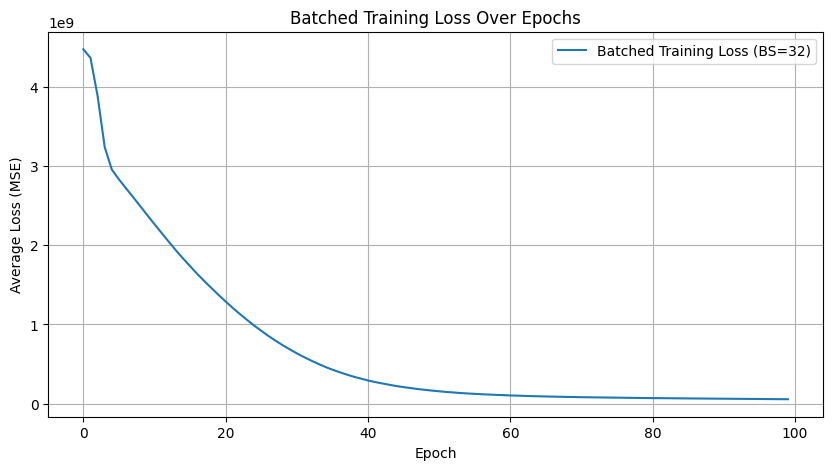

In [9]:
# Cell 9: Modified Training Loop with Batching (Using DataLoader)
# Re-instantiate your model and optimizer if you want to train from scratch with batching.
# Or, you can continue training an existing model. Let's re-instantiate for clarity.

if input_features > 0 and 'train_loader' in locals():
    model_batched = PricePredictor(input_features) # Using definition from Cell 1
    criterion_batched = nn.MSELoss()
    optimizer_batched = optim.Adam(model_batched.parameters(), lr=0.001) # Use your tuned LR if preferred

    epochs_batched = 100 # Adjust as needed
    print(f"\nStarting batched training (Epochs: {epochs_batched}, Batch Size: {batch_size})...")
    batched_train_losses = []

    for epoch in range(epochs_batched):
        model_batched.train()
        epoch_loss = 0.0
        for batch_features, batch_labels in train_loader: # Iterate over batches
            # Forward pass
            outputs = model_batched(batch_features)
            loss = criterion_batched(outputs, batch_labels)
            
            # Backward pass and optimization
            optimizer_batched.zero_grad()
            loss.backward()
            optimizer_batched.step()
            
            epoch_loss += loss.item() * batch_features.size(0) # Accumulate loss, weighted by batch size
        
        avg_epoch_loss = epoch_loss / len(train_loader.dataset)
        batched_train_losses.append(avg_epoch_loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs_batched}], Average Loss: {avg_epoch_loss:.4f}')
            
    print("Batched training complete.")
    plt.figure(figsize=(10,5))
    plt.plot(batched_train_losses, label=f'Batched Training Loss (BS={batch_size})')
    plt.title('Batched Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nCannot start batched training. Ensure model, DataLoaders, etc., are ready.")

In [10]:
# Cell 10: Modified Evaluation with Batching (Using DataLoader)
# Evaluate the model trained with batching.

if 'model_batched' in locals() and 'test_loader' in locals():
    model_batched.eval()
    all_preds_batched = []
    all_labels_batched = []
    
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            outputs = model_batched(batch_features)
            all_preds_batched.append(outputs.numpy())
            all_labels_batched.append(batch_labels.numpy())
            
    # Concatenate predictions and labels from all batches
    y_pred_batched_np = np.concatenate(all_preds_batched)
    y_test_batched_np = np.concatenate(all_labels_batched)

    mae_batched = mean_absolute_error(y_test_batched_np, y_pred_batched_np)
    mse_batched = mean_squared_error(y_test_batched_np, y_pred_batched_np)
    rmse_batched = np.sqrt(mse_batched)
    r2_batched = r2_score(y_test_batched_np, y_pred_batched_np)

    print("\n--- Batched Model Evaluation on Test Set ---")
    print(f"Mean Absolute Error (MAE): {mae_batched:.4f}")
    print(f"Mean Squared Error (MSE): {mse_batched:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_batched:.4f}")
    print(f"R-squared (R2 Score): {r2_batched:.4f}")
else:
    print("\nCannot evaluate batched model. Ensure model was trained with batches and test_loader is available.")


--- Batched Model Evaluation on Test Set ---
Mean Absolute Error (MAE): 51128.1289
Mean Squared Error (MSE): 21453193216.0000
Root Mean Squared Error (RMSE): 146469.0862
R-squared (R2 Score): -0.0496


In [11]:
# Cell 11: Saving the Refined Model
# After all experimentation and tuning, save your best performing model.
# Let's assume 'model_batched' is your best one for this example.

if 'model_batched' in locals(): # Or whichever model instance performed best
    best_model_to_save = model_batched
    
    model_save_path = 'saved_models'
    os.makedirs(model_save_path, exist_ok=True)
    
    # You might want to version your models
    refined_model_filename = 'price_predictor_refined_v1.pth'
    full_refined_model_path = os.path.join(model_save_path, refined_model_filename)
    
    try:
        torch.save(best_model_to_save.state_dict(), full_refined_model_path)
        print(f"\nRefined model state_dict saved to: '{full_refined_model_path}'")
    except Exception as e:
        print(f"Error saving refined model: {e}")
else:
    print("\nNo refined model available for saving (e.g., 'model_batched' not trained).")


Refined model state_dict saved to: 'saved_models\price_predictor_refined_v1.pth'
